<a href="https://colab.research.google.com/github/jacobrobertsdev/MLA_JAR/blob/main/MLA4_JAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Jacob Roberts**  

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [3]:
from sklearn import tree
from sklearn.tree import export_text

## Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [8]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

### Statistical and Visual Exploration

### Splitting Data into Train/Test

In [10]:
X = df.drop(columns=['forgery'])
y = df['forgery']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [11]:
col_transform = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), X.columns)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(
    steps=[
        ('col_transform', col_transform),
        ('decision_tree', tree.DecisionTreeClassifier(max_depth=5))
    ]
)

### Executing the Model

In [12]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('col_transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

### Evaluating Model

In [13]:
y_pred = pipeline.predict(x_test)

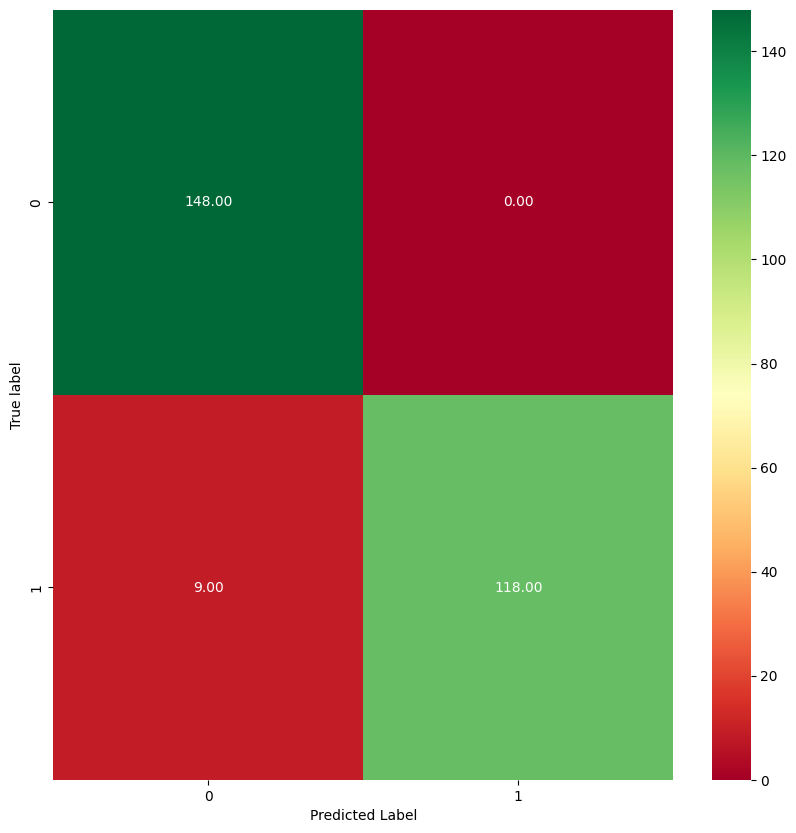

In [14]:
plot_cm(y_test, y_pred)

In [15]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

1.0
0.9291338582677166
0.963265306122449


### Conclusion
This model performed very well at predicting forged bank notes. It predicted forgeries with 100% precision. Recall was slightly lower at .92, indicating some forgeries were missed (false negatives). With an f1 of .96, the model performs very well, but may be able to be adjusted slightly to achieve perfect performance.

## Problem 2

### Reading the Data

In [16]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

In [17]:
df.columns = ['date', 'usage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'C02', 'lag_current_pwr', 'lead_current_pwr', 'nsm', 'week_status', 'day_of_week', 'load_type']
df.head()

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,C02,lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


### Splitting Data into Train/Test

In [18]:
X = df.drop(columns=['date', 'usage_kwh'])
y = df['usage_kwh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

### Building the Pipeline

In [25]:
categories = ['week_status', 'day_of_week', 'load_type']
nums = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'C02', 'lag_current_pwr', 'lead_current_pwr', 'nsm']

col_transform = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categories),
        ('num', MinMaxScaler(), nums)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('transformer', col_transform),
    ('decision_tree', tree.DecisionTreeRegressor())
])

### Executing the Model

In [26]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'C02', 'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('decision_tree', DecisionTreeRegressor())])

### Evaluating Model

In [27]:
y_pred = pipeline.predict(X_test)

In [28]:
# RMSE for training set
y_train_pred = pipeline.predict(X_train)
rsme_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# RMSE for test set
rsme_test = np.sqrt(mean_squared_error(y_test, y_pred))

print(rsme_train)
print(rsme_test)

1.8139564820261272e-16
1.4495011689193733


### Conclusion
This model performed better on unseen data than on the training data. Again, given the scale of the data in this set, with roughly half of the values below 5, I do not think an RSME of 1.44 or 1.81 is as good as it could be. It is certainly a very good improvement over support vector regression used in the previous assignment, which resulted in RSME's over 4. I initially limited the depth of the tree to 5, and got RSME's over 3. Upon removing that limitation, they dropped to 1.44 - 1.81.